# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**:

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [1]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,3.420348,0.995338,-0.472065,-1.669266,-1.679851,311.328198
1,-0.362633,-0.162342,0.407429,0.487402,-0.709569,-34.709007
2,-0.592535,-0.452559,-1.290542,-0.248486,-0.462471,-62.322215
3,0.056793,-0.872165,0.737668,-0.791301,0.662875,-21.441814
4,-0.093977,0.055246,1.154698,0.246466,1.931652,-6.080833


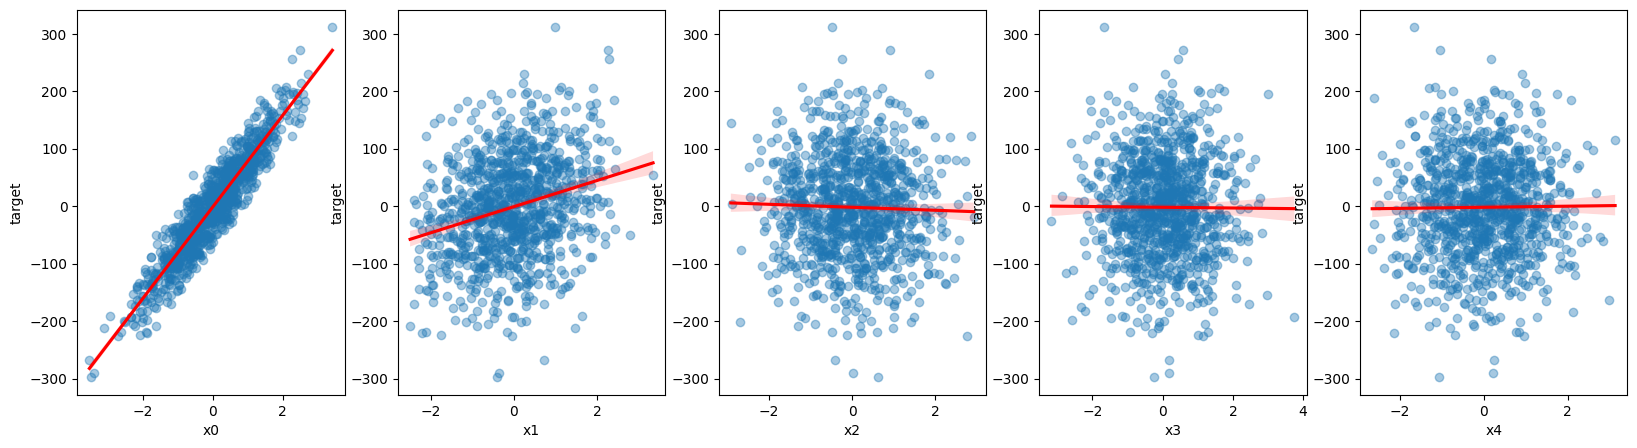

In [4]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [5]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)



In [6]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)



Text(0.5, 1.0, 'Outliers (one-tailed)')

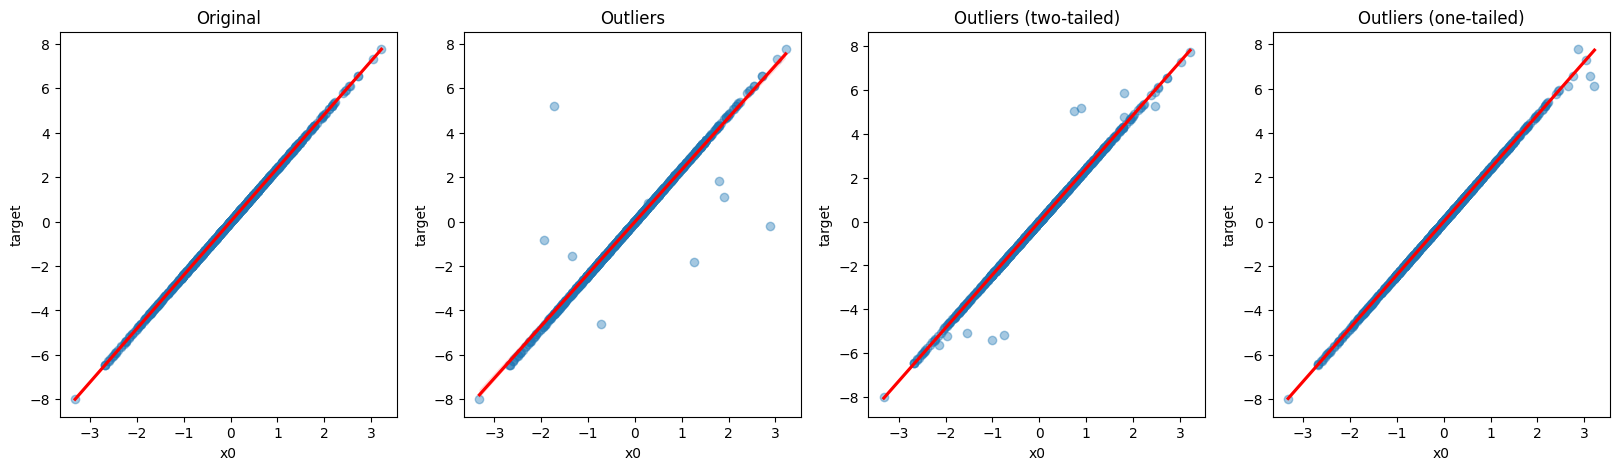

In [7]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

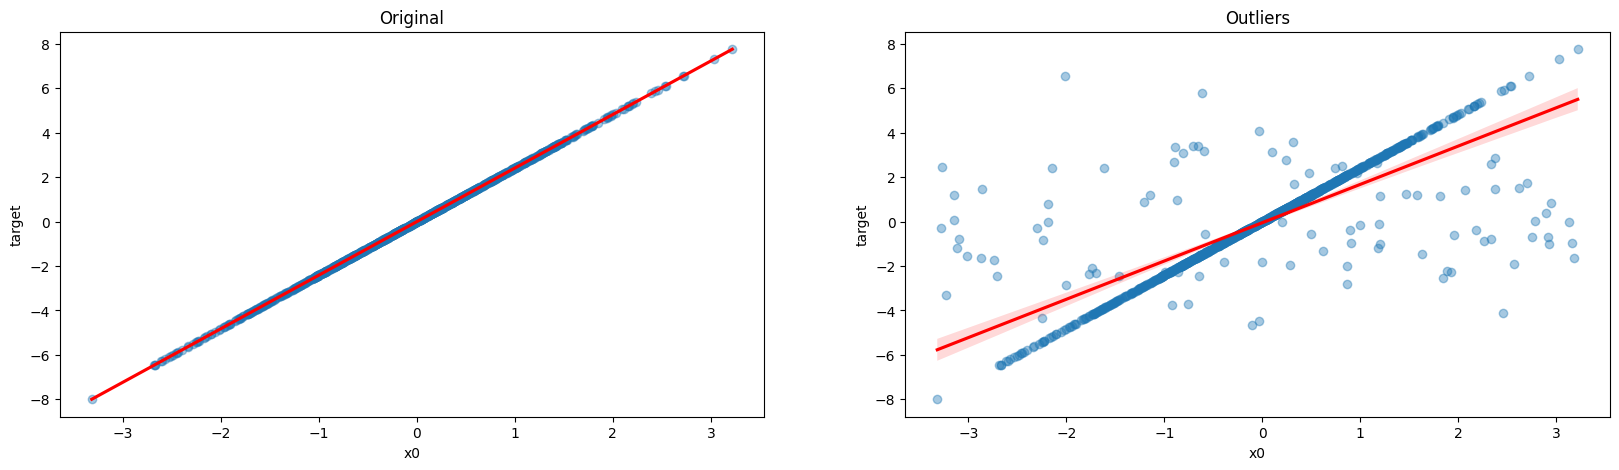

In [8]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [11]:
## Parámetros de la simulación
n_exp = 10
n_samples = 100
n_features = 10
n_informative = 2
n_targets = 1
noise_level = 10.0

# noise = np.linspace(0, 100, 100)
# bias = np.linspace(0, 100, 20)

In [12]:
## Esqueleto de la simulación
"""
 def run_simulation(n_exp, n_samples, n_features, n_informative, n_targets, noise, bias):
     resultados = []
     for _ in tqdm(range(n_exp)):
        for b in bias:
            for n in noise:
                data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )
                
            
                X=data.drop('target',axis=1)
                y=data.target

                X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=None)

                model=LinearRegression()
                model.fit(X_train,y_train)

                y_train_pred=model.predict(X_train)
                y_test_pred=model.predict(X_test)

                mse_train=mean_squared_error(y_train, y_train_pred)
                mse_test=mean_squared_error(y_test,y_test_pred)

                mae_train=mean_absolute_error(y_train,y_train_pred)
                mae_test=mean_absolute_error(y_test,y_test_pred)

                coeficientes=model.coef_

                resultados.append({
                    'noise': n,
                    'bias' : b,
                    'rmse_train': np.sqrt(mse_train),
                    'rmse_test': np.sqrt(mse_test),
                    'mae_train': mae_train,
                    'mae_test': mae_test,
                    'coeficientes': coeficientes}
                )
    return resultados """








"\n def run_simulation(n_exp, n_samples, n_features, n_informative, n_targets, noise, bias):\n     resultados = []\n     for _ in tqdm(range(n_exp)):\n        for b in bias:\n            for n in noise:\n                data = generate_dataset(\n                n_samples=n_samples,\n                n_features=n_features,\n                n_informative=n_informative,\n                n_targets=n_targets,\n                noise=n,\n                bias=b,\n                output='dataframe'\n            )\n                \n            \n                X=data.drop('target',axis=1)\n                y=data.target\n\n                X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=None)\n\n                model=LinearRegression()\n                model.fit(X_train,y_train)\n\n                y_train_pred=model.predict(X_train)\n                y_test_pred=model.predict(X_test)\n\n                mse_train=mean_squared_error(y_train, y_train_pred)\n          

In [13]:
# simulation_results = run_simulation(n_exp, n_samples, n_features, n_informative, n_targets, noise, bias)

In [14]:
# Creacion de eptys arrays
coefficients = []
train_rmse = []
test_rmse = []
train_mae = []
test_mae = []

In [15]:
# Bucle de simulación
for _ in tqdm(range(n_exp)):
    data = generate_dataset(n_samples=n_samples,
                            n_features=n_features,
                            n_informative=n_informative,
                            n_targets=n_targets,
                            noise=noise_level,
                            output='dataframe')

    X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['target'], test_size=0.3)

    # Fitear la regresión
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Métricas
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    test_mae.append(mean_absolute_error(y_test, y_test_pred))

    # Guardar coeficientes
    coefficients.append(model.coef_)

100%|██████████| 10/10 [00:00<00:00, 81.17it/s]


In [16]:
coefficients=np.array(coefficients)
informative_coeffs = coefficients[:, :n_informative]  # Primeros n_informative coeficientes
non_informative_coeffs = coefficients[:, n_informative:]  # Resto de los coeficientes





In [17]:
print(informative_coeffs.shape)

(10, 2)


In [18]:
print(non_informative_coeffs.shape)

(10, 8)


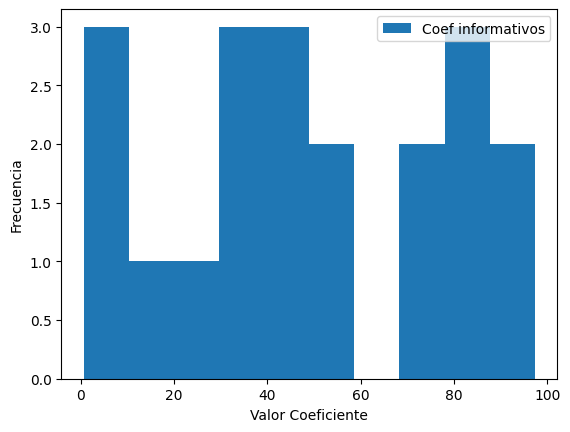

In [19]:
# Distribucion de coeficientes informativos 
plt.hist(informative_coeffs.flatten(),label='Coef informativos')
plt.xlabel('Valor Coeficiente')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [20]:
from scipy.stats import ttest_1samp

# Nivel de significancia (alfa)
alfa = 0.05

# Realizamos la prueba de hipótesis para cada coeficiente
# H0: El coeficiente es igual a cero
# H1: El coeficiente es diferente de cero
t_statistic, p_values = ttest_1samp(informative_coeffs, 0)

    # Comparar el p-valor con el nivel de significancia alfa
for i, p_value in enumerate(p_values):   
    if p_value < alfa:
        print(f'Para el coeficiente {i+1}, rechazamos la hipótesis nula.')
    else:
        print(f'Para el coeficiente {i+1}, no hay suficiente evidencia para rechazar la hipótesis nula.')

Para el coeficiente 1, rechazamos la hipótesis nula.
Para el coeficiente 2, rechazamos la hipótesis nula.


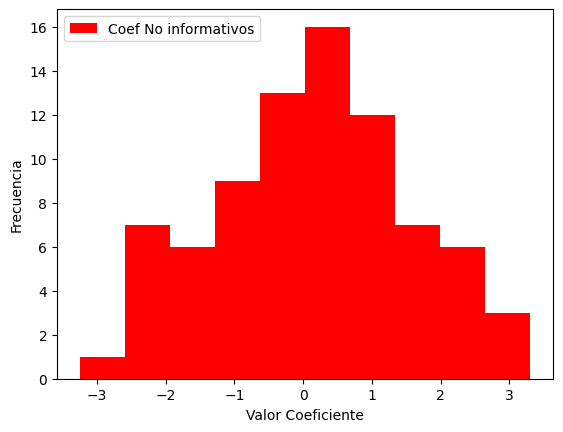

In [21]:
# # Distribucion de coeficientes no informativos 
plt.hist(non_informative_coeffs.flatten(),label='Coef No informativos', color= 'r')
plt.xlabel('Valor Coeficiente')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [22]:
# Nivel de significancia (alfa)
alfa = 0.05

# Realizamos la prueba de hipótesis para cada coeficiente
# H0: El coeficiente es igual a cero
# H1: El coeficiente es diferente de cero
t_statistic, p_values = ttest_1samp(non_informative_coeffs, 0)

    # Comparar el p-valor con el nivel de significancia alfa
for i, p_value in enumerate(p_values):   
    if p_value < alfa:
        print(f'Para el coeficiente {i+1}, rechazamos la hipótesis nula.')
    else:
        print(f'Para el coeficiente {i+1}, no hay suficiente evidencia para rechazar la hipótesis nula.')

Para el coeficiente 1, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 2, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 3, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 4, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 5, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 6, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 7, no hay suficiente evidencia para rechazar la hipótesis nula.
Para el coeficiente 8, no hay suficiente evidencia para rechazar la hipótesis nula.


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [23]:
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    noise=0.5,
                    random_state=42,
                    output='dataframe')

data


,x0,target
0,0.496714,8.456852
1,-0.138264,-2.714959
2,0.647689,11.753645
3,1.523030,25.687060
4,-0.234153,-3.725030
...,...,...
995,-0.281100,-4.817662
996,1.797687,30.835629
997,0.640843,10.734544
998,-0.571179,-9.655858


In [24]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False)


Text(0.5, 1.0, 'Outliers')

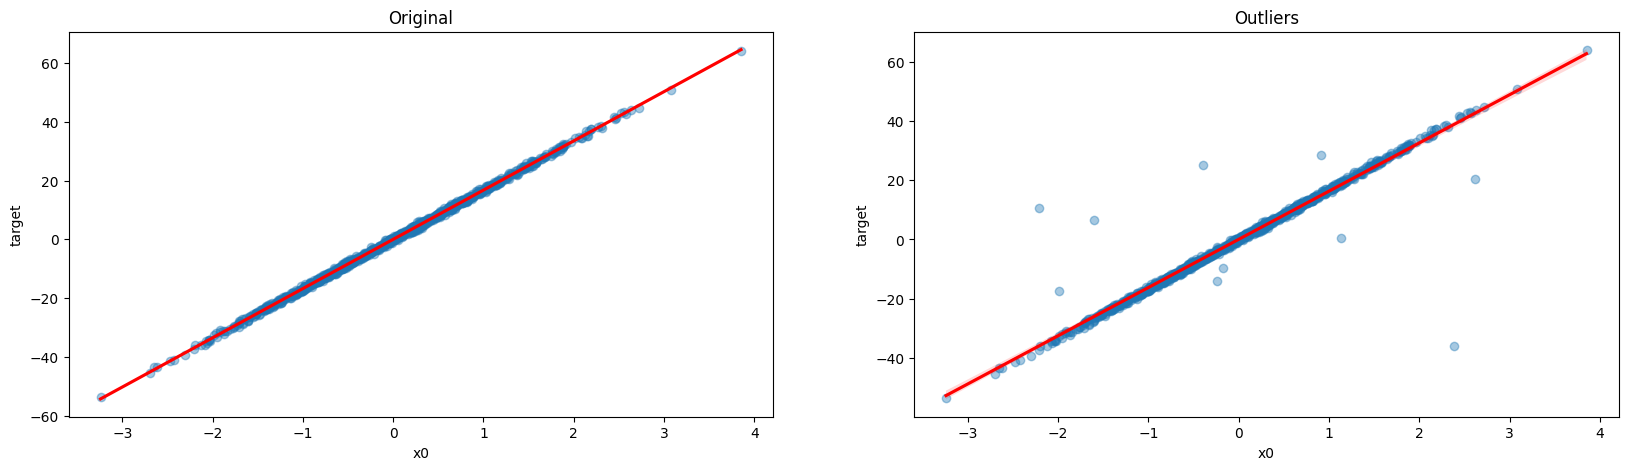

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')


sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

In [26]:
# Inicializo modelos

linear_reg = LinearRegression()
huber_reg = HuberRegressor()
ridge_reg = RidgeCV(alphas=[0.1, 1.0, 10.0])

In [27]:
outlier_percentages = [0.01, 0.03, 0.05, 0.07, 0.1]
for percentage in outlier_percentages:
    data_outliers=generate_outliers(df=data,
    columns=['x0'],
    percentage=percentage,
    extreme_outliers=False,
    only_tails=False)

    # Separamos feature y target
    X=data_outliers['x0'].values.reshape(-1,1)
    y=data_outliers['target']

    # Split data
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    # Entrenamiento de modelos

    linear_reg.fit(X_train, y_train)
    huber_reg.fit(X_train,y_train)
    ridge_reg.fit(X_train, y_train)

    # Predicciones

    y_pred_linear=linear_reg.predict(X_test)
    y_pred_huber=huber_reg.predict(X_test)
    y_pred_ridge=ridge_reg.predict(X_test)

    # Performance modelos
    mse_linear=mean_squared_error(y_test,y_pred_linear)
    mse_huber=mean_squared_error(y_test,y_pred_huber)
    mse_ridge=mean_squared_error(y_test,y_pred_ridge)

    print(f"Porcentaje de outliers: {percentage * 100} %")
    print(f"MSE Linear Regression: {mse_linear}")
    print(f"MSE Huber Regression: {mse_huber}")
    print(f"MSE Ridge Regression: {mse_ridge}")







Porcentaje de outliers: 1.0 %
MSE Linear Regression: 41.84287637503072
MSE Huber Regression: 44.124172247810066
MSE Ridge Regression: 41.82036725488482
Porcentaje de outliers: 3.0 %
MSE Linear Regression: 71.60069214529132
MSE Huber Regression: 84.87875306922218
MSE Ridge Regression: 71.53285687167661
Porcentaje de outliers: 5.0 %
MSE Linear Regression: 49.39607463248419
MSE Huber Regression: 60.22092867637386
MSE Ridge Regression: 49.392679700778224
Porcentaje de outliers: 7.000000000000001 %
MSE Linear Regression: 51.673174407859435
MSE Huber Regression: 56.74442464511663
MSE Ridge Regression: 51.71501109601886
Porcentaje de outliers: 10.0 %
MSE Linear Regression: 99.76667803090005
MSE Huber Regression: 136.6036669586984
MSE Ridge Regression: 99.74684172129611


## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [28]:
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)

    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [29]:
import numpy as np
data_gd = generate_dataset(n_samples=1000,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    bias=500.0,
                    noise=1000.0,
                    random_state=42,
                    output='dataframe')

data


,x0,target
0,0.496714,8.456852
1,-0.138264,-2.714959
2,0.647689,11.753645
3,1.523030,25.687060
4,-0.234153,-3.725030
...,...,...
995,-0.281100,-4.817662
996,1.797687,30.835629
997,0.640843,10.734544
998,-0.571179,-9.655858


In [30]:
# Inicializo random theta
np.random.seed(42)
random_theta=np.zeros(2)
random_theta


array([0., 0.])

In [31]:
# Matriz de caracterisiticas extendidas

# Genero matriz de 1 para la N filas
coef_ind_ones=np.ones(data_gd.shape[0])

# Cocateno con columna data['x0']
X=np.c_[coef_ind_ones,data.x0]

X

array([[ 1.        ,  0.49671415],
       [ 1.        , -0.1382643 ],
       [ 1.        ,  0.64768854],
       ...,
       [ 1.        ,  0.64084286],
       [ 1.        , -0.57117899],
       [ 1.        ,  0.57258278]])

In [32]:
# Vector de observaciones

y=data.target
y

0       8.456852
1      -2.714959
2      11.753645
3      25.687060
4      -3.725030
         ...    
995    -4.817662
996    30.835629
997    10.734544
998    -9.655858
999     9.631021
Name: target, Length: 1000, dtype: float64

Parámetros óptimos: [50.57588166 17.06030628]
Historial de pérdida en train: [3672.9701673572454, 3560.3703377441957, 3452.2792889298667, 3348.5164650018514, 3248.9085409685667, 3153.289133156288, 3061.498521205655, 2973.3833812030325, 2888.7965295007057, 2807.596676797791, 2729.648192070844, 2654.8208759596537, 2582.9897432294947, 2514.0348139462694, 2447.840913015568, 2384.297477750616, 2323.298373147533, 2264.741714559174, 2208.52969747122, 2154.5684340960433, 2102.7677965112584, 2053.0412660808274, 2005.305788907075, 1959.481637072052, 1915.4922754363613, 1873.2642337728512, 1832.7269840214983, 1793.8128224603531, 1756.4567565956465, 1720.5963965820392, 1686.1718509915704, 1653.1256267571164, 1621.402533123173, 1590.9495894434453, 1561.7159366711705, 1533.652752394274, 1506.713169273381, 1480.8521967463778, 1456.0266458687065, 1432.1950571637874, 1409.317631363013, 1387.3561629195742, 1366.273976185029, 1346.0358641419607, 1326.6080295903462, 1307.958028689369, 1290.0547167603265, 

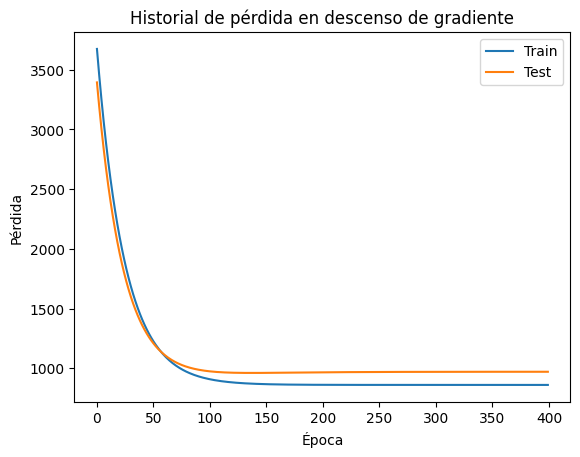

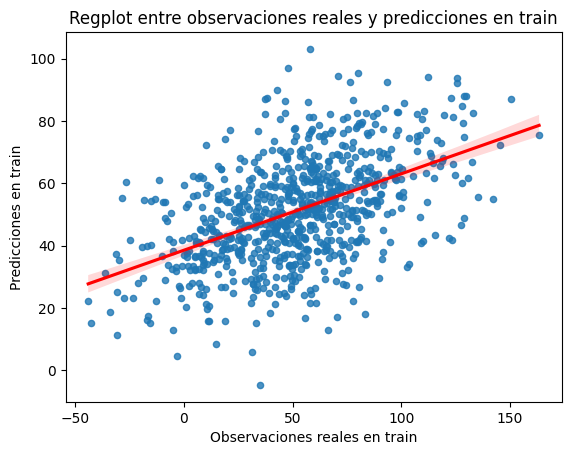

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Creación de dataset
data_gd = generate_dataset(n_samples=1000, n_features=1, n_informative=1, n_targets=1, bias=50.0, noise=30.0, random_state=42, output='dataframe')

# Función de cálculo de gradiente
def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    N = len(y)
    y_hat = X.dot(theta)
    grad = (-2 / N) * X.T.dot(y - y_hat)
    return grad

# Función de descenso de gradiente con evaluación en train y test
def GD_with_evaluation(X_train, y_train, X_test, y_test, learning_rate=0.01, max_epochs=1000, tolerance=1e-5):
    N_train, d = X_train.shape
    theta = np.random.rand(d)  # Inicialización aleatoria de los parámetros
    loss_history_train = []
    loss_history_test = []

    for epoch in range(max_epochs):
        # Calcular predicciones en train y test
        y_train_pred = X_train.dot(theta)
        y_test_pred = X_test.dot(theta)

        # Calcular el gradiente en train
        gradiente_train = gradient(X_train, y_train, theta)

        # Actualizar los parámetros en train
        theta -= learning_rate * gradiente_train

        # Calcular la función de pérdida en train
        loss_train = mean_squared_error(y_train, y_train_pred)
        loss_history_train.append(loss_train)

        # Calcular la función de pérdida en test
        loss_test = mean_squared_error(y_test, y_test_pred)
        loss_history_test.append(loss_test)

        # Condición de parada basada en la mejora de la función de pérdida
        if epoch > 0 and abs(loss_history_train[epoch - 1] - loss_history_train[epoch]) < tolerance:
            break

    return theta, loss_history_train, loss_history_test

# Dividir los datos en train y test
X_train, X_test, y_train, y_test = train_test_split(data_gd[['x0']], data_gd['target'], test_size=0.2, random_state=42)

# Agregar una columna de unos a X para el término de intersección en train y test
X_train_extended = np.c_[np.ones(X_train.shape[0]), X_train.values]
X_test_extended = np.c_[np.ones(X_test.shape[0]), X_test.values]

# Aplicar el descenso de gradiente con evaluación en train y test
optimal_beta, loss_history_train, loss_history_test = GD_with_evaluation(X_train_extended, y_train.values, X_test_extended, y_test.values)

# Imprimir los resultados
print("Parámetros óptimos:", optimal_beta)
print("Historial de pérdida en train:", loss_history_train)
print("Historial de pérdida en test:", loss_history_test)

# Gráfica de la función de pérdida en cada época para train y test
plt.plot(loss_history_train, label='Train')
plt.plot(loss_history_test, label='Test')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Historial de pérdida en descenso de gradiente')
plt.legend()
plt.show()

# Regplot entre observaciones reales y predicciones en train
sns.regplot(x=y_train, y=X_train_extended.dot(optimal_beta), scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.xlabel('Observaciones reales en train')
plt.ylabel('Predicciones en train')
plt.title('Regplot entre observaciones reales y predicciones en train')
plt.show()


#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

Epoch 1/100, Train MSE: 402.1507600868617, Test MSE: 357.21098582521984
Epoch 2/100, Train MSE: 366.1388671464678, Test MSE: 325.2967704583664
Epoch 3/100, Train MSE: 334.34853360858193, Test MSE: 297.28227223924273
Epoch 4/100, Train MSE: 306.3174604677738, Test MSE: 272.7300067854388
Epoch 5/100, Train MSE: 281.5684629363536, Test MSE: 251.19258249147518
Epoch 6/100, Train MSE: 259.7391900340033, Test MSE: 232.3275556883239
Epoch 7/100, Train MSE: 240.47779573085393, Test MSE: 215.80520027658255
Epoch 8/100, Train MSE: 223.46168718266824, Test MSE: 201.3250838895836
Epoch 9/100, Train MSE: 208.45617156030522, Test MSE: 188.66528764362417
Epoch 10/100, Train MSE: 195.2203670170759, Test MSE: 177.60061297957643
Epoch 11/100, Train MSE: 183.52587086093436, Test MSE: 167.92077091444307
Epoch 12/100, Train MSE: 173.2162406563876, Test MSE: 159.4776508344495
Epoch 13/100, Train MSE: 164.1189723435077, Test MSE: 152.11222842066272
Epoch 14/100, Train MSE: 156.08014065559456, Test MSE: 145.6

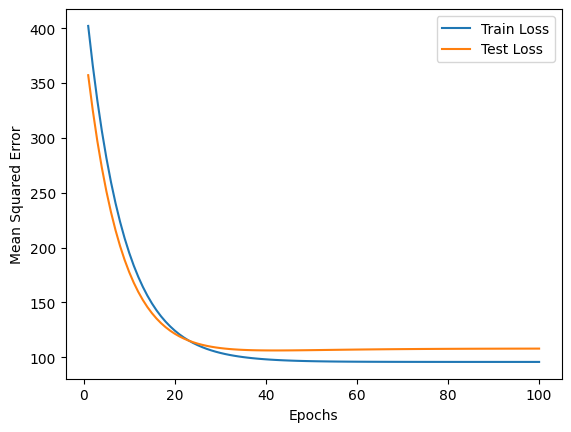

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

    
def stochastic_gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, epochs=100, batch_size=128):
    np.random.seed(42)
    coefficients = np.random.rand(X_train.shape[1])
    
    train_losses = []
    test_losses = []

    num_observations_train = X_train.shape[0]
    num_observations_test = X_test.shape[0]

    for epoch in range(epochs):
        indices_train = np.random.permutation(num_observations_train)
        X_train_shuffled = X_train[indices_train]
        y_train_shuffled = y_train[indices_train]

        for i in range(0, num_observations_train, batch_size):
            X_batch = X_train_shuffled[i:i+batch_size]
            y_batch = y_train_shuffled[i:i+batch_size]

            y_pred = np.dot(X_batch, coefficients)
            error = y_pred - y_batch

            gradient = np.dot(X_batch.T, error) / batch_size
            coefficients -= learning_rate * gradient

        # Calcular pérdida en entrenamiento y prueba
        train_loss = mean_squared_error(y_train, np.dot(X_train, coefficients))
        test_loss = mean_squared_error(y_test, np.dot(X_test, coefficients))

        train_losses.append(train_loss)
        test_losses.append(test_loss)

        print(f'Epoch {epoch + 1}/{epochs}, Train MSE: {train_loss}, Test MSE: {test_loss}')

    return coefficients, train_losses, test_losses

# Genera datos y divide en conjuntos de entrenamiento y prueba
data_sgd = generate_dataset(n_samples=1000, n_features=1, n_informative=1, n_targets=1, bias=10.0, noise=10.0, random_state=42, output='dataframe')
X = np.c_[np.ones(data_sgd.shape[0]), data_sgd['x0'].values]
y = data_sgd['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamiento del modelo y obtención de pérdidas
coefficients, train_losses, test_losses = stochastic_gradient_descent(X_train, y_train, X_test, y_test)

# Imprime los coeficientes finales
print('Coeficientes finales:', coefficients)

# Gráfica de la pérdida en entrenamiento y prueba
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()




In [39]:
indices_train = np.random.permutation(X_train.shape[0])
indices_train

array([ 57, 650, 411, 497, 708, 753, 794, 569,  68, 221, 276, 237, 232,
       514, 755, 294, 732, 245, 397, 496, 141, 142, 600, 660, 127,  21,
       259, 174, 693, 444, 515, 488, 750, 429, 149, 746, 747, 249, 712,
       483, 110, 116, 342, 452, 455,  23, 356, 134, 227, 115, 594, 178,
       162, 365, 120, 759, 387, 331, 625, 763, 469, 657, 690, 378, 226,
       644, 380, 241, 301, 147, 448,  71,   8,   1, 590, 319, 493, 271,
       415, 438, 776, 624, 542, 140, 150, 711, 451,  77, 220, 366, 769,
         2, 768, 187, 407,  28, 251, 633, 439, 521, 738, 481, 639, 169,
       156, 541, 302, 327, 610, 740, 250, 662, 262, 728, 460, 124, 573,
       760, 674, 722, 247, 582, 446, 640, 117, 255, 328, 435,  79, 512,
       345, 441,  65, 717, 406,  97, 340, 536, 101, 479, 580, 758, 376,
       475, 426, 697, 143, 524, 119,  19, 526, 636,   6, 139, 412, 736,
        30, 312, 402, 382,  60, 784, 414, 453, 539,  37, 622, 372, 203,
       394, 344, 348, 377, 264, 716,  36, 664, 638, 336, 107, 38

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

### Ejercicio 7

TBD